# Exploratory Data Analysis

Let's take a look at the endoscopic image data and get a sense of the amount, format, size, and content of the data.  What are the labels?  What kind of variety is there?  Are there artifacts/glitches in the images?  Repeats?  Any more processing that should be done in the content, labelling, organization, or anything else?

In [20]:
PathToImages = '../../data/1-pre-processed'
!printf "Number of (pre-processed) .jpg files:  "
!find $PathToImages -type f -name "*.jpg" | wc -l
!printf "Number of (pre-processed) .jpeg files: "
!find $PathToImages -type f -name "*.jpeg" | wc -l

Number of (pre-processed) .jpg files:    138062
Number of (pre-processed) .jpeg files:        0


In [1]:
import cv2  # OpenCV (Open Source Computer Vision Library)

In [2]:
img = cv2.imread('../../data/1-pre-processed/Colon/Normal/jpgs/misc/YnAFmw3300_P1 01.jpg')

In [3]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(576, 576, 3)


Populating the interactive namespace from numpy and matplotlib


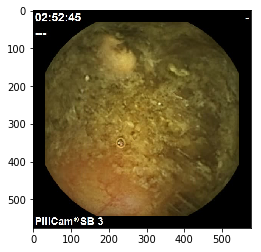

In [12]:
#%pylab inline
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#img = mpimg.imread('../../data/1-pre-processed/Colon/Normal/jpgs/misc/YnAFmw3300_P1 01.jpg')
#imgplot = plt.imshow(img)
#plt.show()

In [4]:
#import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pylab, mlab
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize, getfigs
#from pylab import *
#from numpy import *
%matplotlib inline

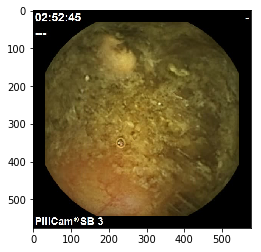

<class 'numpy.ndarray'>
(576, 576, 3)


In [26]:
import matplotlib.image as mpimg
img = mpimg.imread('../../data/1-pre-processed/Colon/Normal/jpgs/misc/YnAFmw3300_P1 01.jpg')
imgplot = plt.imshow(img)
plt.show()
print(type(img))
print(img.shape)

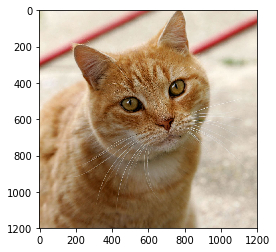

<class 'numpy.ndarray'>
(1199, 1200, 3)


In [27]:
test_img = mpimg.imread('test.jpg')
img2plot = plt.imshow(test_img)
plt.show()
print(type(test_img))
print(test_img.shape)

In [42]:
test_img_height   = 1199
test_img_width    = 1200
test_img_channels = 3
test_img_shape    = (test_img_height, test_img_width, test_img_channels)

In [35]:
from keras.layers import Input
test_input_shape = img2.shape
test_input_tensor = Input(shape=test_img.shape)

In [68]:
import tensorflow as tf
#tf.image.decode_jpeg('test.jpg')
filename = 'test.jpg'
fileContent = tf.read_file(filename)
image = tf.image.decode_jpeg(fileContent) # decoding jpg into a tf tensor
print(image)
print(tf.shape(image))
image_set = tf.expand_dims(image, 0)
print(image_set)
print(type(image_set))
#tf.print(image_set)  # no tf.print??
#tf.print(image_set, output_stream=sys.stderr)

Tensor("DecodeJpeg_17:0", shape=(?, ?, ?), dtype=uint8)
Tensor("Shape_18:0", shape=(3,), dtype=int32)
Tensor("ExpandDims_10:0", shape=(1, ?, ?, ?), dtype=uint8)
<class 'tensorflow.python.framework.ops.Tensor'>


In [38]:
import keras
analyzer = keras.applications.mobilenet_v2.MobileNetV2(input_shape=None, alpha=1.0, depth_multiplier=1, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)
#analyzer = keras.applications.mobilenet_v2.MobileNetV2(input_shape=test_input_shape, alpha=1.0, depth_multiplier=1, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

In [61]:
analyzer(image_set)

TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64